In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import keras
from sklearn import preprocessing
import tensorflow as tf

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data Science Projects/DL/ipl_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:
df = df.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [11]:
X = df.drop('total',axis=1)
y = df['total']

In [9]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [15]:
from sklearn.preprocessing import LabelEncoder

#creating lebelEncoder Function
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

#fit and transform categorical variables
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [17]:
X.head()

,venue,bat_team,bowl_team,batsman,bowler
0,14,6,12,328,201
1,14,6,12,61,201
2,14,6,12,61,201
3,14,6,12,61,201
4,14,6,12,61,201


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#Defining Neural Network
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(216,activation='relu'),
    keras.layers.Dense(1,activation='linear')
])

#compling model with hubber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)

In [21]:
#traing the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 52.9044 - val_loss: 22.1150
Epoch 2/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 22.2682 - val_loss: 22.6045
Epoch 3/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.2595 - val_loss: 22.0512
Epoch 4/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.2075 - val_loss: 22.0762
Epoch 5/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 22.2235 - val_loss: 21.9148
Epoch 6/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.1032 - val_loss: 21.9384
Epoch 7/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 22.1843 - val_loss: 21.8228
Epoch 8/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.1872 - val_loss: 21.9668
Epoch 9/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 21.9937 - val_loss: 21.8269
Epoch 10/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 22.0905 - val_loss: 21.8503
Epoch 11/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 21.9783 - val_loss: 22.1591
Epoch 12/50
951/951 ━━━━━━━━━━

<Axes: >

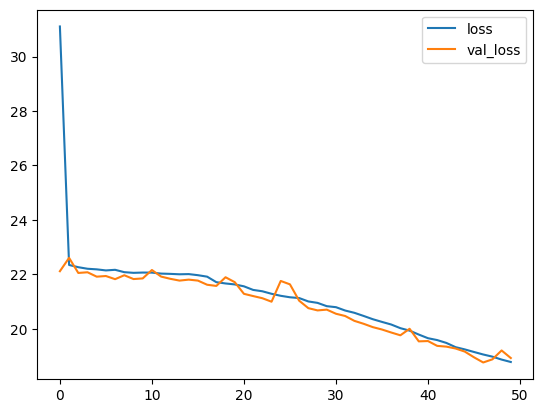

In [22]:
#ploting the loss
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [24]:
# Make predictions
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


19.41746018207803

In [25]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [26]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()